In [15]:
from langgraph.graph import StateGraph,START,END
from langchain_groq import ChatGroq
from typing import Literal,TypedDict,Annotated
from pydantic import BaseModel, Field
from langchain_core.messages import SystemMessage, HumanMessage,BaseMessage
from langgraph.graph.message import add_messages
from langgraph.checkpoint.memory import MemorySaver

In [8]:
class ChatState(TypedDict):
    messages :Annotated[list[BaseMessage],add_messages]

In [9]:
model= ChatGroq(model="llama-3.3-70b-versatile", temperature=1)


In [10]:
def chat_node(state:ChatState):
    #take quesry from state
    message = state['messages']
    #send to llm
    response = model.invoke(message)
    #response store state
    return {'messages':[response]}

In [16]:
checkpointer= MemorySaver()
graph = StateGraph(ChatState)

graph.add_node('chat_node',chat_node)

graph.add_edge(START,'chat_node')
graph.add_edge('chat_node',END)

workflow = graph.compile(checkpointer=checkpointer)

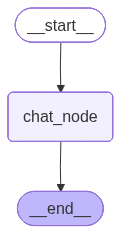

In [17]:
workflow

In [13]:
intital_state = {'messages': [HumanMessage(content="What is the capital of France?")]}

workflow.invoke(intital_state)

{'messages': [HumanMessage(content='What is the capital of France?', additional_kwargs={}, response_metadata={}, id='df06558b-e89a-4469-bea9-f8caaa73d026'),
  AIMessage(content='The capital of France is Paris.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 8, 'prompt_tokens': 42, 'total_tokens': 50, 'completion_time': 0.01093595, 'completion_tokens_details': None, 'prompt_time': 0.002203514, 'prompt_tokens_details': None, 'queue_time': 0.048320682, 'total_time': 0.013139464}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_68f543a7cc', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c333b-709b-7663-be19-9aeb9e152bd0-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 42, 'output_tokens': 8, 'total_tokens': 50})]}

In [18]:
thread_id = '1'
while True:
    user_message = input("You: ")
    print(f"User message: {user_message}")
    if user_message.lower() in ['exit', 'quit']:
        print("Exiting chat.")
        break
    
    config = {'configurable': {'thread_id': thread_id}} 
    response = workflow.invoke({'messages': [HumanMessage(content=user_message)]}, config=config)
    print(f"Chatbot: {response['messages'][-1].content}")

User message: hi my name is samarth
Chatbot: Hello Samarth! It's nice to meet you. How are you doing today? Is there something I can help you with or would you like to chat?
User message: what is my name
Chatbot: Your name is Samarth!
User message: exit
Exiting chat.


In [21]:
model.__getstate__()

{'__dict__': {'name': None,
  'cache': None,
  'verbose': False,
  'callbacks': None,
  'tags': None,
  'metadata': None,
  'custom_get_token_ids': None,
  'rate_limiter': None,
  'disable_streaming': False,
  'output_version': None,
  'profile': {'max_input_tokens': 131072,
   'max_output_tokens': 32768,
   'image_inputs': False,
   'audio_inputs': False,
   'video_inputs': False,
   'image_outputs': False,
   'audio_outputs': False,
   'video_outputs': False,
   'reasoning_output': False,
   'tool_calling': True},
  'client': <groq.resources.chat.completions.Completions at 0x20e84447250>,
  'async_client': <groq.resources.chat.completions.AsyncCompletions at 0x20e84447d90>,
  'model_name': 'llama-3.3-70b-versatile',
  'temperature': 1.0,
  'stop': None,
  'reasoning_format': None,
  'reasoning_effort': None,
  'model_kwargs': {},
  'groq_api_key': SecretStr('**********'),
  'groq_api_base': None,
  'groq_proxy': None,
  'request_timeout': None,
  'max_retries': 2,
  'streaming': Fals